In [6]:
#Import necessary library

import requests
import certifi
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import FixedLocator
from IPython.core.display import display, HTML

In [ ]:
#Replace with your API key
api_key = "255446bcdde7ca9fe776258d09e8411bbb8d1cade2ebd6aba440f80f6817c3fd"

#Character to exlude from search
excludeWords = ["[","\\", "]", "_", "`", "!", "\"", "#", "%", "'", "(", ")", "+", ",", "-", "–", ".", "/", ":", ";", "{", "|", "}", "=", "~", "?" ]

#API Url
url = "https://sia.ardc-hdcl-sia-iaw.cloud.edu.au/api/v1"

In [7]:
# List All Text Sets

request_url = url + "/text-sets"

response = requests.get(request_url, headers={"X-API-KEY": api_key})

if response.status_code == 200:
    text_sets = response.json()
    
    # Loop through each text set to print its ID and name
    print("List of Text Sets:" /n)
    for text_set in text_sets:
        set_id = text_set.get('id', 'N/A')  # 'N/A' will be used if 'id' is not available
        set_name = text_set.get('name', 'N/A')  # 'N/A' will be used if 'name' is not available
        print(f"  - Name: {set_name}   ID: {set_id}")

else:
    print(f"Failed to get data: {response.status_code} {response.reason}")

List of Text Sets:
  - Name: Shakespeare   ID: 86


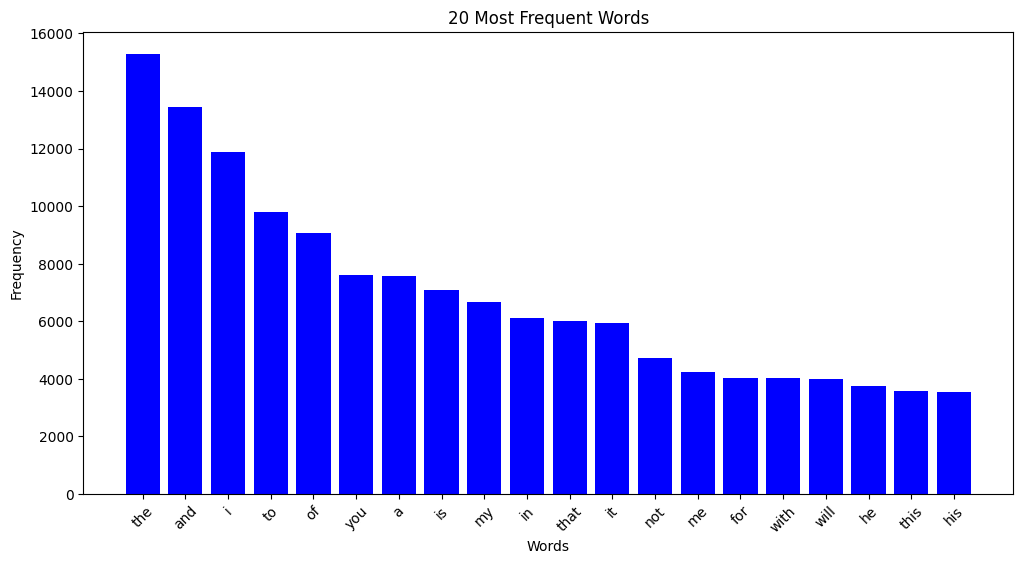

In [8]:
#Top 20 most frequent words

textset_id = 86  # Replace with your actual text set ID

request_url = url + "/word-frequencies"
word_freq_request = {
    'textSet': textset_id,
    'option' :{
        'outputSize' : 20,
        'excludeWords'; excludeWords,
    }
}

# Make the API Request
response = requests.post(request_url, json=word_freq_request, headers={"X-API-KEY": api_key}, timeout=1200)

# Create a dictionary to hold word frequencies
word_frequency_map = {}

# Handle the Response
if response.status_code == 200:
    response_data = response.json()
    blocks = response_data.get("blocks", [])

    for block in blocks:
        freqs = block.get('frequencies', [])

        for freq in freqs:
            word = freq.get('word')
            value = freq.get('value')

            word_frequency_map[word] = word_frequency_map.get(word, 0) + value

    # Sort by frequency and take the top 20 words
    sorted_items = sorted(word_frequency_map.items(), key=lambda x: x[1], reverse=True)
    sorted_words = [item[0] for item in sorted_items]
    sorted_frequencies = [item[1] for item in sorted_items]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_words, sorted_frequencies, color='blue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('20 Most Frequent Words')
    plt.xticks(rotation=45)
    plt.show()


else:
    print(f"Failed: {response.status_code} {response.reason}")

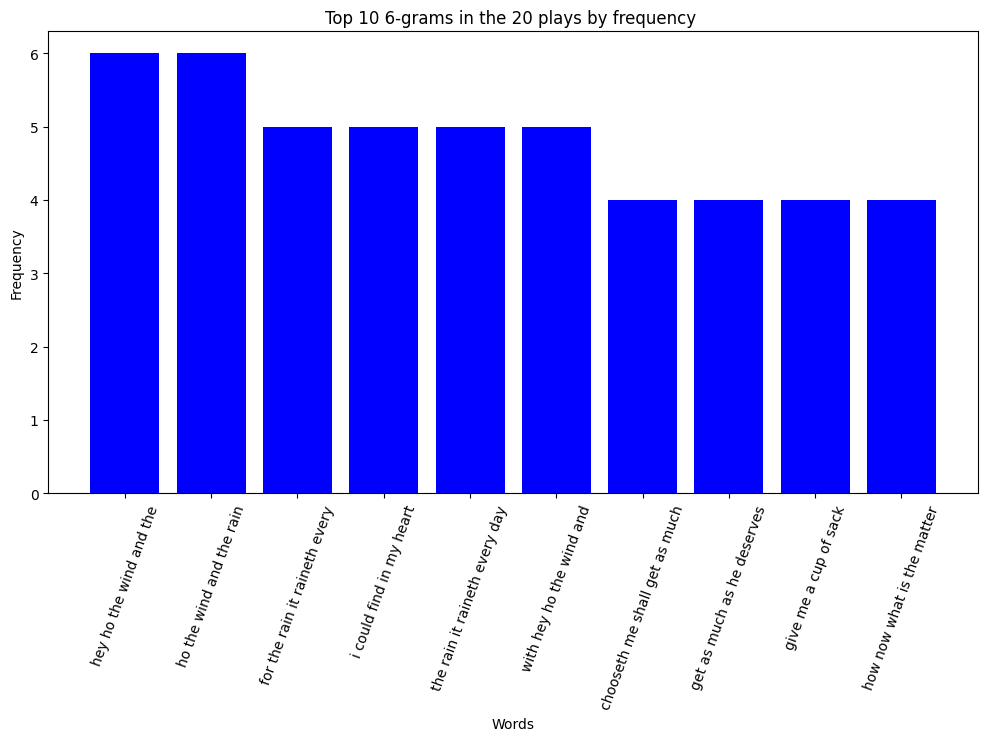

In [9]:
# EX1: The top 10 6-grams in the 20 plays by frequency

# Text set = Shakespeare 20 for demos
# Segment by text
# Ngrams = 6
# Output Size = 10

textset_id = 86  # Replace with your actual text set ID

request_url = url + "/word-frequencies"
word_freq_request = {
    'textSet': textset_id,
    'option':{
        'blockMethod': 0,       # Segment by text
        'numberOfNGrams' : 6,
        'outputSize': 10,
        'excludeWords': excludeWords,
    }
}

# Make the API Request
response = requests.post(request_url, json=word_freq_request, headers={"X-API-KEY": api_key}, timeout=1200)

# Create a dictionary to hold word frequencies
word_frequency_map = {}

# Handle the Response
if response.status_code == 200:
    response_data = response.json()
    blocks = response_data.get("blocks", [])

    for block in blocks:
        freqs = block.get('frequencies', [])

        for freq in freqs:
            word = freq.get('word')
            value = freq.get('value')

            word_frequency_map[word] = word_frequency_map.get(word, 0) + value

    # Sort by frequency and take the top 20 words
    sorted_items = sorted(word_frequency_map.items(), key=lambda x: x[1], reverse=True)
    sorted_words = [item[0] for item in sorted_items]
    sorted_frequencies = [item[1] for item in sorted_items]

    # # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_words, sorted_frequencies, color='blue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 10 6-grams in the 20 plays by frequency ')
    plt.xticks(rotation=70)
    plt.show()


else:
    print(f"Failed: {response.status_code} {response.reason}")

In [10]:
# EX2: The size of character parts from largest to smallest in these 20 plays 

# Text set = Shakespeare 20 for demos 
# Segment by text and by character 
# Top 10 words 
# Output – n=640 
# Transform and chart – sort by Size, largest to smallest. Chart this row as a scatterplot. 

textset_id = 86  # Replace with your actual text set ID 

request_url = url + "/word-frequencies"
character_parts_request = {
    'textSet': textset_id,
    'option': {
        'segmentByCharacter': True,  #Segment by character
        'blockMethod' : 0,           #Segment by text
        'outputSize': 640,
        'excludeWords': excludeWords,
    }
}

# Make API request
response = requests.post(request_url, json=character_parts_request, headers={"X-API-KEY": api_key}, timeout=1200)

# Create a dictionary to hold character frequencies
character_frequency_map = {}

# Handle the response
if response.status_code == 200:
    response_data = response.json()
    blocks = response_data.get("blocks", [])

    for block in blocks:
        freqs = block.get('frequencies', [])

        for freq in freqs:
            word = freq.get('word' , "Unknown")
            word_count = freq.get('value', 0)
            
            character_frequency_map[word] = character_frequency_map.get(word, 0) + word_count

    # Sort by size and take the top 640 characters
    sorted_characters = sorted(character_frequency_map.items(), key=lambda x: x[1], reverse=True)
    names = [item[0] for item in sorted_characters]
    sizes = [item[1] for item in sorted_characters]

    # Scatterplot
    plt.figure(figsize=(12, 6))
    plt.scatter(names, sizes, c='blue')
    plt.xticks(rotation=90)
    plt.xlabel('Character Names')
    plt.ylabel('Size of Spoken Part')
    plt.title('Size of Character Parts in 20 Shakespeare Plays')
    plt.show()

else:
    print(f"Failed: {response.status_code} {response.reason}")

Failed: 500 Internal Server Error


In [ ]:
# 3. Frequencies of HAS and HATH in the plays 

# Text set = Shakespeare 20 for demos 
# Segment by text 
# Include metadata in output 
# Words unsorted – HAS HATH 
# Output – choose proportions 
# Transform and chart – sort by DATE, plot HAS and HATH as lines 

textset_id = 86  # Replace with your actual text set ID 

request_url = url + "/word-frequencies"
character_parts_request = {
    'textSet': textset_id,
    'option': {
        'blockMethod' : 0,         #Segment by text
        'includeMetadata' : True
        'outputSize': 1000 , 
        'outputSpecialWords' : ["has","hath"],
        'outputSpecialWordsOption' : 0,
        'excludeWords': excludeWords,
    }
}


# Make API request
response = requests.post(request_url, json=character_parts_request, headers={"X-API-KEY": api_key}, timeout=1200)

special_word_count_by_year = {"has": {}, "hath": {}}
total_word_count_by_year = {}

# Handle the response
if response.status_code == 200:
    response_data = response.json()
    blocks = response_data.get("blocks", [])
    print(response_data)
    
    for block in blocks:
        name = block.get("name", "")
        freqs = block.get("frequencies", [])
        
        # Extract year from name
        year = name.split("_")[-1].split(" ")[0]
        
        for freq in freqs:
            word = freq.get("word", "")
            value = freq.get("value", 0)
            
            if word.lower() == "has":
                special_word_count_by_year["has"][year] = special_word_count_by_year["has"].get(year, 0) + value
            elif word.lower() == "hath":
                special_word_count_by_year["hath"][year] = special_word_count_by_year["hath"].get(year, 0) + value
                
            total_word_count_by_year[year] = total_word_count_by_year.get(year, 0) + value

    # Sort by Year
    sorted_years = sorted(set(special_word_count_by_year["has"].keys()) | set(special_word_count_by_year["hath"].keys()))
    has_counts = [(special_word_count_by_year["has"].get(year, 0) / total_word_count_by_year.get(year, 1)) * 100 for year in sorted_years]
    hath_counts = [(special_word_count_by_year["hath"].get(year, 0) / total_word_count_by_year.get(year, 1)) * 100 for year in sorted_years]

    plt.figure(figsize=(12, 6))
    plt.plot(sorted_years, has_counts, label='HAS', marker='o')
    plt.plot(sorted_years, hath_counts, label='HATH', marker='o')
    plt.scatter(sorted_years, has_counts)
    plt.scatter(sorted_years, hath_counts)
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.title('Percentage of "HAS" and "HATH" over years')

    y_ticks = plt.gca().get_yticks()
    plt.gca().yaxis.set_major_locator(FixedLocator(y_ticks))
    plt.gca().set_yticklabels(['{:.2f}%'.format(y) for y in y_ticks])

    plt.legend()
    plt.show()
else:
    print(f"Failed: {response.status_code} {response.reason}")